# <center>OECD Alcohol Consumption per Capita
<img src='https://images.squarespace-cdn.com/content/v1/5f777ef4c9213f4b5800fc9a/1637362735867-URTBTP2BNVEZU8P3SDAO/teen+drinking.jpg'>

# Read Data

In [1]:
import pandas as pd 
data=pd.read_csv("/kaggle/input/oecd-alcohol-consumption-per-capita/OECD Alcohol Consumption per Capita.csv",index_col='index')

In [2]:
#First 5 rows
data.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,LITRES/CAPITA,Flag Codes
index,,,,,,,,
0,AUS,ALCOHOL,TOT,LT_CAP15,A,1960,9.3,NaN
1,AUS,ALCOHOL,TOT,LT_CAP15,A,1961,9.4,NaN
2,AUS,ALCOHOL,TOT,LT_CAP15,A,1962,9.5,NaN
3,AUS,ALCOHOL,TOT,LT_CAP15,A,1963,9.8,NaN
4,AUS,ALCOHOL,TOT,LT_CAP15,A,1964,10.1,NaN


In [3]:
#Numerical Columns
data.describe(percentiles=[0.25,0.5,0.75,0.95,0.99]).style.background_gradient(cmap='Oranges',axis=0)

,TIME,LITRES/CAPITA
count,2751.000000,2751.000000
mean,1991.840058,8.946892
std,17.196571,4.248435
min,1960.000000,0.000000
25%,1977.000000,6.100000
50%,1993.000000,9.200000
75%,2007.000000,11.600000
95%,2018.000000,16.100000
99%,2021.000000,19.450000
max,2022.000000,23.600000


In [4]:
#Categorical Columns
data.select_dtypes('object').describe()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,Flag Codes
count,2751,2751,2751,2751,2751,216
unique,49,1,1,1,1,4
top,CAN,ALCOHOL,TOT,LT_CAP15,A,D
freq,63,2751,2751,2751,2751,192


In [5]:
#Non-Null Value Count of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2751 entries, 0 to 2750
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LOCATION       2751 non-null   object 
 1   INDICATOR      2751 non-null   object 
 2   SUBJECT        2751 non-null   object 
 3   MEASURE        2751 non-null   object 
 4   FREQUENCY      2751 non-null   object 
 5   TIME           2751 non-null   int64  
 6   LITRES/CAPITA  2751 non-null   float64
 7   Flag Codes     216 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 193.4+ KB


<Axes: >

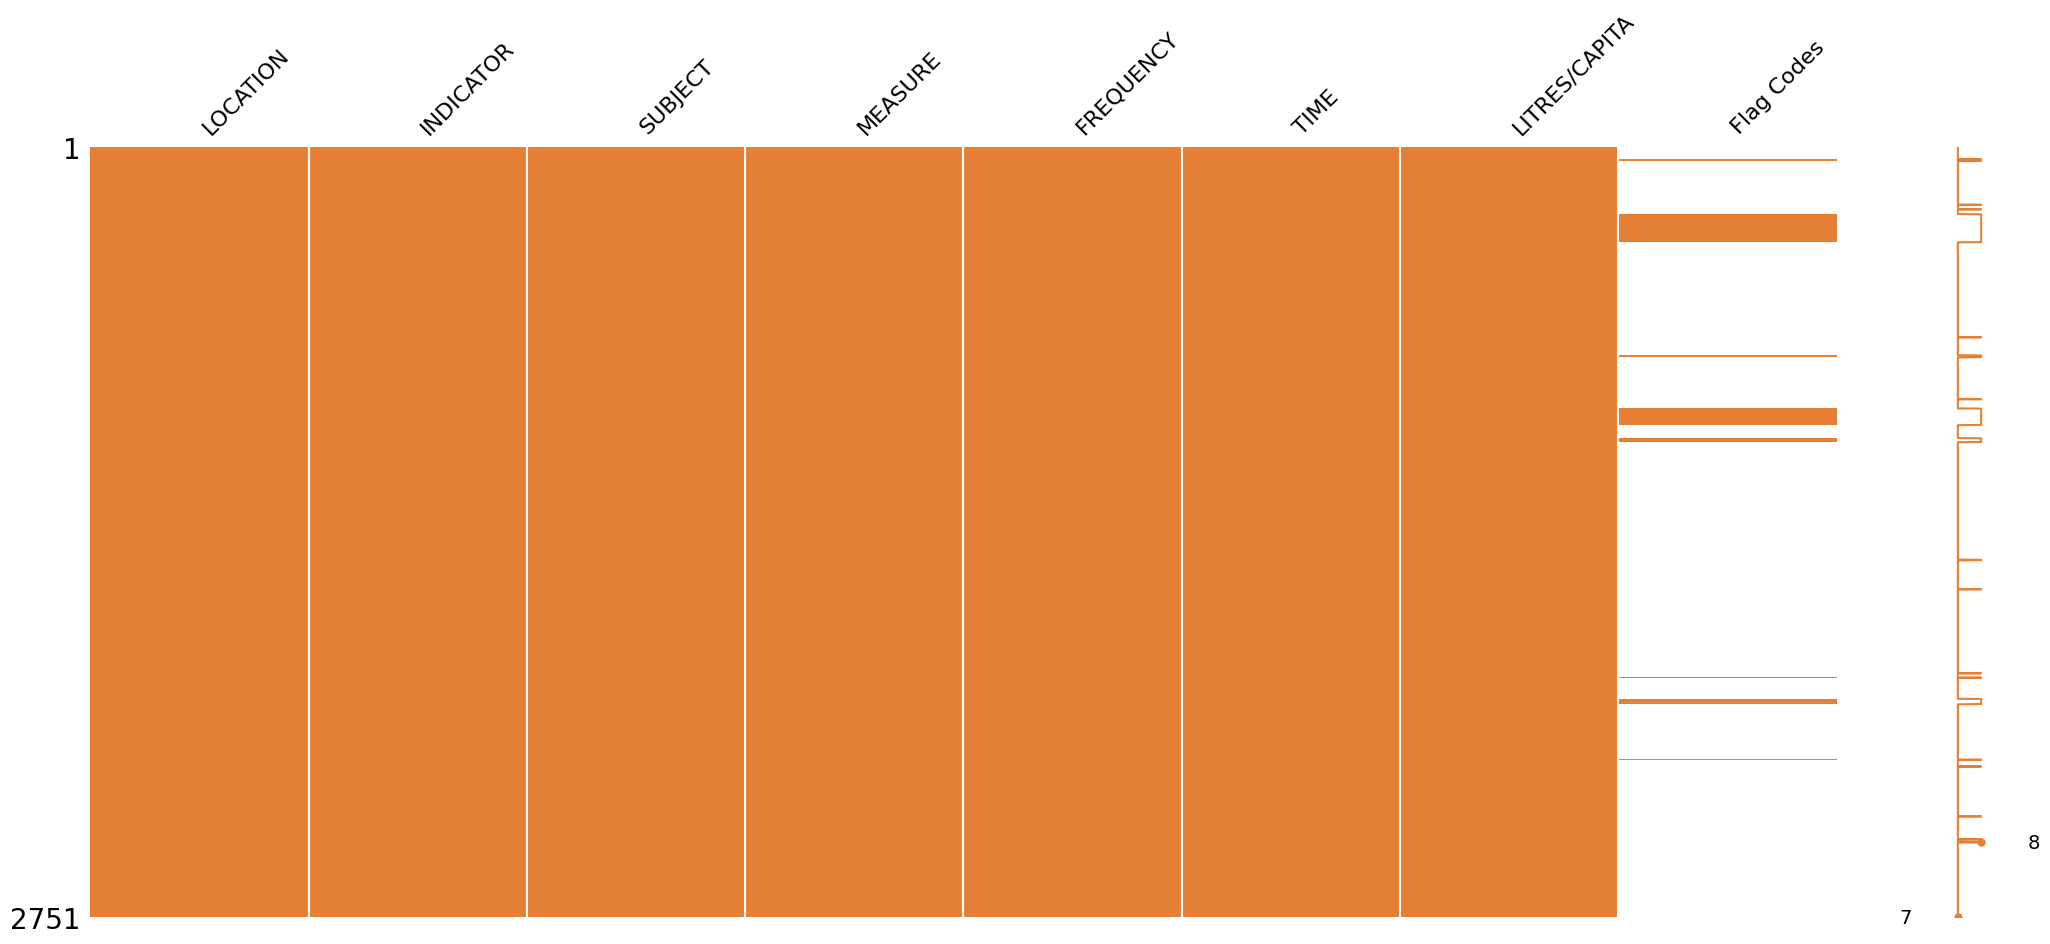

In [6]:
import missingno as msno
#Getting the missing values
msno.matrix(data,color=(0.9,0.5,0.2))

# Column name and their Description
1. **LOCATION**: The country or region for which the alcohol consumption data is reported. **(Categorical)**

2. **INDICATOR**: Information about the specific indicator or measurement being reported, related to alcohol consumption. **(Categorical)**

3. **SUBJECT**: The subject or topic to which the indicator relates, providing further context about the alcohol consumption data. **(Categorical)**

4. **MEASURE**: The unit of measurement for the indicator, indicating how alcohol consumption is measured in this dataset (e.g., litres per capita). **(Categorical)**

5. **FREQUENCY**: Indicates how frequently the data is reported, such as annually or quarterly. **(Categorical)**

6. **TIME**: The time period for which the data is reported. **(Categorical)**

7. **LITRES/CAPITA**: The amount of alcohol consumed per capita in litres per person. **(Numeric)**

8. **Flag Codes**: Codes indicating any flags or notes associated with specific data points. **(Categorical)**

# EDA

In [7]:
from pprint import pprint
#Value Counts of each categorical value columnwise
pprint("------Value Counts of each categorical value columnwise---")
for i in data.select_dtypes('object'):
    pprint(data[i].value_counts())
    print("\n")
    

'------Value Counts of each categorical value columnwise---'
LOCATION
CAN    63
IRL    63
NOR    63
CHE    62
HUN    62
USA    62
TUR    62
NLD    62
SVK    62
FIN    62
CRI    62
AUT    62
SWE    62
MEX    61
POL    61
KOR    61
GBR    61
ESP    60
ISL    60
CHN    59
IND    59
ISR    59
ZAF    59
COL    59
ARG    59
PER    59
IDN    59
ROU    59
PRT    59
JPN    59
DEU    59
LUX    59
ITA    59
DNK    58
AUS    58
GRC    57
CHL    57
BRA    57
BGR    57
BEL    57
NZL    55
FRA    52
LVA    42
CZE    42
SVN    41
HRV    33
EST    32
RUS    27
LTU    27
Name: count, dtype: int64


INDICATOR
ALCOHOL    2751
Name: count, dtype: int64


SUBJECT
TOT    2751
Name: count, dtype: int64


MEASURE
LT_CAP15    2751
Name: count, dtype: int64


FREQUENCY
A    2751
Name: count, dtype: int64


Flag Codes
D    192
B     13
E      9
P      2
Name: count, dtype: int64




In [8]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import plotly.express as px
fig = px.line(data, x='TIME',y='LITRES/CAPITA',color='LOCATION', title='OECD Alcohol Consumption per Capita year-wise')
fig.show()

In [9]:
import plotly.graph_objects as go
fig = px.choropleth(data[['LOCATION','LITRES/CAPITA']].groupby('LOCATION').mean().reset_index(), locations='LOCATION',
                           color_continuous_scale="Oranges",
                            color='LITRES/CAPITA',
                            range_color=(0, 18),
                            title='OECD Alcohol Consumption per Capita Mean'
                          )
fig.show()

In [10]:
fig = px.choropleth(data[['LOCATION','LITRES/CAPITA','TIME']].groupby('LOCATION').max("TIME").reset_index(), locations='LOCATION',
                           color_continuous_scale="Oranges",
                            color='LITRES/CAPITA',
                            range_color=(0, 18),
                            title='OECD Alcohol Consumption per Capita Latest available'
                          )
fig.show()

In [11]:
fig = px.choropleth(data[data['Flag Codes']=='D'].groupby('LOCATION').count().reset_index(), locations='LOCATION',
                           color_continuous_scale="Oranges",
                            color='Flag Codes',
                            range_color=(0, 18),
                            title='OECD Alcohol Consumption per Capita Flag Code=D'
                          )
fig.show()

In [12]:
fig = px.choropleth(data[data['Flag Codes']=='B'].groupby('LOCATION').count().reset_index(), locations='LOCATION',
                           color_continuous_scale="Oranges",
                            color='Flag Codes',
                            range_color=(0, 18),
                            title='OECD Alcohol Consumption per Capita Flag Code=B'
                          )
fig.show()

In [13]:
fig = px.choropleth(data[data['Flag Codes']=='E'].groupby('LOCATION').count().reset_index(), locations='LOCATION',
                           color_continuous_scale="Oranges",
                            color='Flag Codes',
                            range_color=(0, 18),
                            title='OECD Alcohol Consumption per Capita Flag Code=E'
                          )
fig.show()

In [14]:
fig = px.choropleth(data[data['Flag Codes']=='P'].groupby('LOCATION').count().reset_index(), locations='LOCATION',
                           color_continuous_scale="Oranges",
                            color='Flag Codes',
                            range_color=(0, 18),
                            title='OECD Alcohol Consumption per Capita Flag Code=P'
                          )
fig.show()